# 1. Set up for database and data structure

In [1]:
from treeNode import*
import pandas
import numpy as np
import operator
from math import log
datasets = np.array(pandas.read_csv('house_votes_84.csv'))
print(datasets)

[[1 2 1 ... 1 2 1]
 [1 2 1 ... 1 0 1]
 [0 2 2 ... 1 1 0]
 ...
 [1 0 1 ... 1 2 1]
 [1 1 1 ... 1 2 1]
 [1 2 1 ... 0 1 1]]


In [2]:
print(datasets.shape)

(435, 17)


In [3]:
x = datasets[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]]
y = datasets[:,16]
print(x)
print(y)

[[1 2 1 ... 2 1 2]
 [1 2 1 ... 2 1 0]
 [0 2 2 ... 2 1 1]
 ...
 [1 0 1 ... 2 1 2]
 [1 1 1 ... 2 1 2]
 [1 2 1 ... 2 0 1]]
[1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 1
 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0
 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0
 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 

In [21]:
import sklearn
from sklearn.model_selection import train_test_split
trainX, trainY, testX, testY = train_test_split(x, y, test_size=0.2)
print(trainX)
print(testX)
print(trainY)
print(testY)

[[2 2 2 ... 1 2 2]
 [1 2 1 ... 2 1 1]
 [1 2 1 ... 2 1 0]
 ...
 [2 2 2 ... 1 2 2]
 [1 0 1 ... 2 1 0]
 [1 1 1 ... 2 1 0]]
[0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1
 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1
 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1
 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1]
[[1 1 2 ... 1 2 0]
 [1 2 1 ... 2 1 1]
 [2 1 2 ... 1 2 0]
 ...
 [2 2 1 ... 2 1 2]
 [1 2 2 ... 2 2 2]
 [1 1 2 ... 2 1 2]]
[0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 

# Tree's shang calculation

In [5]:
import math
def calShang(column, output):
    outputPosi = 0
    
    zeroPosi = 0
    onePosi = 0
    twoPosi = 0
    
    zeroNum = 0
    oneNum = 0
    twoNum = 0
    index = 0
    while index<len(column):
        if column[index] == 0:
            zeroNum +=1
            if output[index] == 1:
                zeroPosi +=1
        if column[index] == 1:
            oneNum +=1
            if output[index] == 1:
                onePosi +=1
        if column[index] == 2:
            twoNum +=1
            if output[index] == 1:
                twoPosi +=1
        if output[index] == 1:
            outputPosi +=1
        index +=1
    if zeroPosi==zeroNum or onePosi==oneNum or twoPosi==twoNum or outputPosi==len(output):
        return 0
    endD = calHelp(outputPosi,len(output))
    end0 = calHelp(zeroPosi,zeroNum)
    end1 = calHelp(onePosi,oneNum)
    end2 = calHelp(twoPosi,twoNum)
    return endD-(zeroNum/len(output)*end0 + oneNum/len(output)*end1 + twoNum/len(output)*end2)

In [6]:
def calHelp(positive, totalNum):
    if positive >= totalNum or positive == 0:
        return 0
    return -((positive/totalNum)*math.log(positive/totalNum)+((totalNum-positive)/totalNum)*math.log((totalNum-positive)/totalNum))

In [7]:
print(trainX[:,0])

[1 1 2 2 2 2 1 2 1 1 2 1 1 1 2 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 2 2 2
 2 1 1 1 2 1 1 1 2 1 2 2 1 0 1 2 1 2 1 1 2 2 1 2 1 1 1 2 2 2 2 1 1 1 2 2 1
 2 2 1 1 2 1 2 1 1 2 2 1 2 1 1 1 1 2 2 1 2 1 1 1 2 1 1 1 1 1 2 2 1 2 1 2 2
 1 2 2 2 2 2 1 1 2 2 1 2 1 1 2 1 2 2 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 2 2 2 1 0 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 2 1 1 1 2 1 2 1 2
 0 1 2 2 1 2 1 1 2 1 2 1 2 1 2 2 2 1 1 2 2 1 0 2 2 2 1 1 1 2 2 1 0 1 2 2 0
 1 1 0 2 2 1 2 2 2 1 2 2 2 1 0 2 1 1 2 1 2 1 2 1 1 1 2 1 1 2 1 2 2 1 1 2 1
 1 1 1 2 1 1 1 1 1 2 2 1 2 1 1 2 1 0 1 2 1 2 2 1 2 2 1 1 1 2 1 2 1 2 2 2 2
 2 1 2 2 2 2 2 1 1 1 2 2 1 2 2 1 2 1 2 1 2 2 2 1 1 2 2 2 2 1 0 1 2 1 1 2 1
 1 1 1 2 1 2 1 2 1 1 1 1 2 1 1]


In [8]:
def shangListCreate(x,y,indexList):
    shangList = []
    index = 0
    while index<16:
        if index not in indexList:
            shangList.append([calShang(x[:,index],y),index])
        index+=1
    shangList.sort()
    #if shangList[15][0] == 0:
        #print(x)
        #print(y)
    #print(shangList)
    return shangList

In [9]:
listInit = shangListCreate(trainX,trainY,[])
#print(listInit)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
sortedList = listInit.sort()
print(listInit)

In [ ]:
def getNewIndex(sortedShangList,indexList):
    index = 0
    while index<len(sortedShangList):
        if sortedShangList[index][0]>0:
            if sortedShangList[index][1] not in indexList:
                return sortedShangList[index][1]
        index +=1
    #print(sortedShangList)
    return -1

# TreeNode Selection

In [ ]:
def nodeSetup(x,y,indexList,node):
    sortedList = shangListCreate(x,y)
    index = getNewIndex(sortedList,indexList)
    zeroNum = 0
    for i in y:
        if i==0:
            zeroNum +=1
    if zeroNum==0:
        node = treeNode(True)
        return
    if zeroNum==len(y):
        node = treeNode(False)
        return
    if index == -1:
        node = treeNode(y[0])
        return
    if len(y)==0:
        if y[0] == 0:
            node = treeNode(False)
            return
        else:
            node = treeNode(True)
            return
    indexList.append(index)
    leftNodeList,leftY,midNodeList,midY,rightNodeList,rightY = splitData(x,y,index)
    node = treeNode(index,nodeSetup(leftNodeList,leftY,indexList,node.left),nodeSetup(rightNodeList,rightY,indexList,node.right),nodeSetup(midNodeList,midY,indexList,node.mid))
    #print(node.getValue())
    
    #node.left = nodeSetup(leftNodeList,leftY,indexList,node.left)
    #node.right = nodeSetup(rightNodeList,rightY,indexList,node.right)
    #node.mid = nodeSetup(midNodeList,midY,indexList,node.mid)

In [ ]:
def splitData(x,y,index):
    splitCol = x[:,index]
    leftNodeList = []
    midNodeList = []
    rightNodeList = []
    leftY = []
    midY = []
    rightY = []
    i = 0
    while i<len(y):
        if splitCol[i] == 0:
            leftNodeList.append(np.array(x[i]))
            leftY.append(y[i])
        if splitCol[i] == 1:
            midNodeList.append(np.array(x[i]))
            midY.append(y[i])
        if splitCol[i] == 2:
            rightNodeList.append(np.array(x[i]))
            rightY.append(y[i])
        i+=1
    leftList= np.array(leftNodeList)
    leftYList = np.array(leftY)
    midList = np.array(midNodeList)
    midYList = np.array(midY)
    rightList = np.array(rightNodeList)
    rightYList = np.array(rightY)
    return leftList, leftYList, midList, midYList, rightList, rightYList

In [ ]:
leftNodeList,leftY,midNodeList,midY,rightNodeList,rightY = splitData(trainX,trainY,1)
root = treeNode(9,None,None,None)
root = treeNode(9,nodeSetup(leftNodeList,leftY,[9],root.left),nodeSetup(midNodeList,midY,[9],root.mid),nodeSetup(rightNodeList,rightY,[9],root.right))
#root.left = nodeSetup(leftNodeList,leftY,[9],root.left)
#print("end")
#root.mid = nodeSetup(midNodeList,midY,[9],root.mid)
#print("end")
#root.right = nodeSetup(rightNodeList,rightY,[9],root.right)

In [ ]:
print(type(root.left))

In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
print(trainX)
print(trainY)
clf = clf.fit(trainX, testX)
clf = clf.predict(trainY)

[[1 2 1 ... 2 1 1]
 [1 1 1 ... 2 1 2]
 [2 1 2 ... 1 2 0]
 ...
 [2 2 2 ... 1 2 2]
 [1 1 1 ... 2 1 2]
 [1 1 1 ... 2 1 2]]
[[1 1 1 ... 2 0 2]
 [2 1 2 ... 1 0 2]
 [1 0 2 ... 1 2 2]
 ...
 [1 0 1 ... 2 1 1]
 [2 2 2 ... 1 1 0]
 [1 2 2 ... 2 1 2]]


In [17]:
print(clf)

[1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 1 1 0 1]


In [19]:
def printOutPredict(prediction, accurate):
    totalNum = len(prediction)
    accNum = 0
    index = 0
    while index<totalNum:
        #print(prediction[index])
        #print(accurate[index])
        if prediction[index]==accurate[index]:
            accNum = accNum+1
        index = index+1
    #print("predicted data accuracy:")
    #print(accNum*100.0/totalNum)
    return accNum*100.0/totalNum

In [20]:
printOutPredict(clf,testY)

predicted data accuracy:
91.95402298850574


91.95402298850574

In [53]:
accArray = []
index = 0
while index < 99:
    trainX, trainY, testX, testY = train_test_split(x, y, test_size=0.2)
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(trainX, testX)
    clf = clf.predict(trainY)
    accArray.append(printOutPredict(clf,testY))
    index +=1
print(accArray)

predicted data accuracy:
94.25287356321839
predicted data accuracy:
86.20689655172414
predicted data accuracy:
94.25287356321839
predicted data accuracy:
90.80459770114942
predicted data accuracy:
94.25287356321839
predicted data accuracy:
90.80459770114942
predicted data accuracy:
95.40229885057471
predicted data accuracy:
93.10344827586206
predicted data accuracy:
96.55172413793103
predicted data accuracy:
95.40229885057471
predicted data accuracy:
88.50574712643679
predicted data accuracy:
94.25287356321839
predicted data accuracy:
95.40229885057471
predicted data accuracy:
97.70114942528735
predicted data accuracy:
95.40229885057471
predicted data accuracy:
96.55172413793103
predicted data accuracy:
97.70114942528735
predicted data accuracy:
86.20689655172414
predicted data accuracy:
94.25287356321839
predicted data accuracy:
94.25287356321839
predicted data accuracy:
95.40229885057471
predicted data accuracy:
93.10344827586206
predicted data accuracy:
90.80459770114942
predicted d

2.65026572704649
93.75362823638686


(array([ 2.,  6.,  3.,  8.,  7., 14., 20., 21., 11.,  7.]),
 array([86.20689655, 87.47126437, 88.73563218, 90.        , 91.26436782,
        92.52873563, 93.79310345, 95.05747126, 96.32183908, 97.5862069 ,
        98.85057471]),
 <BarContainer object of 10 artists>)

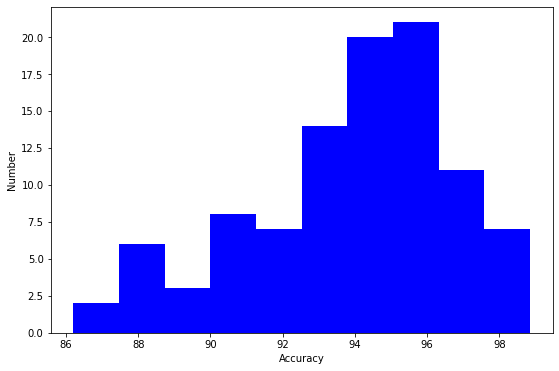

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

npacc = np.array(accArray)
print(npacc.std())
print(npacc.mean())

fig, axs = plt.subplots(figsize=(9,6))
plt.xlabel('Accuracy')
plt.ylabel('Number')
axs.hist(accArray,bins=10,histtype='bar',facecolor='blue')